D=3, i=0
D=3, i=1
D=3, i=2
D=3, i=3
D=3, i=4
D=3, i=5
D=3, i=6
D=3, i=7
D=3, i=8
D=4, i=0
D=4, i=1
D=4, i=2
D=4, i=3
D=4, i=4
D=4, i=5
D=4, i=6
D=4, i=7
D=4, i=8
D=4, i=9
D=4, i=10
D=4, i=11
D=4, i=12
D=4, i=13
D=4, i=14
D=4, i=15
D=4, i=16
D=5, i=0
D=5, i=1
D=5, i=2
D=5, i=3
D=5, i=4
D=5, i=5
D=5, i=6
D=5, i=7
D=5, i=8
D=5, i=9
D=5, i=10
D=5, i=11
D=5, i=12
D=5, i=13
D=5, i=14
D=5, i=15
D=5, i=16
D=5, i=17
D=5, i=18
D=5, i=19
D=5, i=20
D=5, i=21
D=5, i=22
D=5, i=23
D=5, i=24
D=5, i=25
D=5, i=26
D=5, i=27
D=5, i=28
D=5, i=29
D=5, i=30
D=5, i=31
D=5, i=32


Text(0, 0.5, '$\\frac{n(D, i)}{4(i-1)}$')

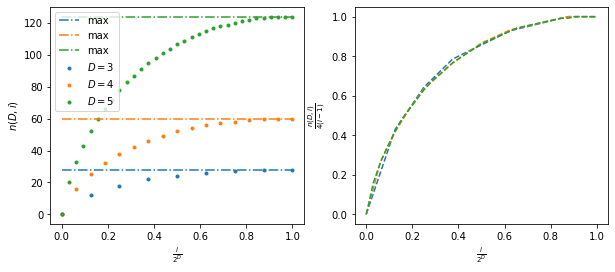

In [12]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt

def compute_expectation(D, i, M=2):
    if i == 0:
        return 0

    if D == 1:
        return 2**M
    elif 0 < i < 2**D:
        js = np.arange(max(i-2**(D-1), 0), min(2**(D-1), i) + 1)
        # print(i, js)
        ps = np.zeros(len(js))
        for m, j in enumerate(js):
            L = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-i+j)*np.math.factorial(i-j))
            R = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-j)*np.math.factorial(j))
            Den = np.math.factorial(2**D)/(np.math.factorial(2**D-i)*np.math.factorial(i))
            ps[m] = L*R/Den
        # print(ps)
        return 2**M + sum([p * (compute_expectation(D-1, i-j) + compute_expectation(D-1, j)) for j, p in zip(js, ps)])
    elif i == 2**D:
        # print("Found purely positive node %d" % (2**M*(i-1)))
        return 2**M*(i-1)


fig = plt.figure(figsize=(10, 4))
axes = fig.subplots(1, 2)

M = 2
xx = []
pp = []
for D in np.arange(3, 6):
    n_max = 2**M*(2**D-1)
    c = np.arange(0, 2**D+1)
    ns = np.zeros(len(c))
    for i in c:
        print("D=%d, i=%d" % (D, i))
        ns[i] = np.round(compute_expectation(D, i))
    ax = axes[0]
    ax.scatter(c/2**D, ns, marker='.', label=r"$D = %d$" % D)
    ax.plot([0, 1], n_max * np.ones(2), '-.', label="max")
    ax = axes[1]
    ax.plot(c/2**D, ns/n_max, '--')
ax = axes[0]
ax.set_xlabel(r"$\frac{i}{2^D}$")
ax.set_ylabel(r"$n(D, i)$")
ax.legend()
ax = axes[1]
ax.set_xlabel(r"$\frac{i}{2^D}$")
ax.set_ylabel(r"$\frac{n(D, i)}{4(i-1)}$")

In [2]:
import numpy as np
for D in [3, 2]:
    for i in np.arange(0, 2**D+1):
        js = np.arange(max(i-2**(D-1), 0), min(2**(D-1), i) + 1)
        # print(i, js)
        ps = np.zeros(len(js))
        for m, j in enumerate(js):
            L = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-i+j)*np.math.factorial(i-j))
            R = np.math.factorial(2**(D-1))/(np.math.factorial(2**(D-1)-j)*np.math.factorial(j))
            Den = np.math.factorial(2**D)/(np.math.factorial(2**D-i)*np.math.factorial(i))
            ps[m] = L*R/Den
        e = sum(np.multiply(js, ps))
        print(i/2**D, e/2**(D-1), ps[0] if js[0] == 0 else 1 - sum(ps))

0.0 0.0 1.0
0.125 0.125 0.5
0.25 0.25 0.21428571428571427
0.375 0.37499999999999994 0.07142857142857142
0.5 0.5 0.014285714285714285
0.625 0.6249999999999999 0.0
0.75 0.75 0.0
0.875 0.875 0.0
1.0 1.0 0.0
0.0 0.0 1.0
0.25 0.25 0.5
0.5 0.5 0.16666666666666666
0.75 0.75 0.0
1.0 1.0 0.0


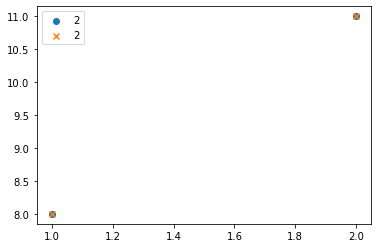

In [18]:
from scipy.special import gamma
import matplotlib.pyplot as plt

_factorial = lambda x: gamma(x+1)
p1 = lambda c, rho: _factorial(2**(c-1))*_factorial(2**c*(1-rho))*_factorial(2**c*rho) / (_factorial(2**c*(.5 - rho))*_factorial(2**c*rho)*_factorial(2**c))
def E(c, rho):
    if rho == 0:
        return 0
    else:
        if c == 1:
            return 1
        else:
            return 1 + 2 * (1-p1(c, rho)) * E(c-1, rho)

for c in [2]:
    # print(p1(c, 1/2**c))
    rho = np.arange(1, 2**(c-1)+1)/2**c
    # _p1 = [p1(c, r) for r in rho]
    _E = np.array([E(c, r) for r in rho])
    _E2 = np.array([compute_expectation(c, r*2**c) for r in rho])
    # plt.plot(rho, _p1, label=c)
    plt.scatter(rho*2**c, np.round(_E*4), label=c)
    plt.scatter(rho*2**c, np.round(_E2), marker="x", label=c)
    # print(p1(c, .5))
plt.legend()
# plt.yscale("log")

1.0